# Benchmarking

In this notebook, we will perform benchmarking for the proposed QNim circuit for four different cases as follows:
+ 1 winnable move possible $heap=[1,3,4,5]$
+ Multiple winnable move possible $heap=[1,3,4,7]$
+ No winnable move possible $heap=[1,3,5,7]$
+ Misere step $heap=[1,7,1,0]$

In [79]:
from qiskit import QuantumCircuit, execute
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer import QasmSimulator
from qnim import *
from qiskit.tools.visualization import plot_histogram

In [80]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-community', group='qamp', project='fall-22-29')
provider.backends()

ibmqfactory.load_account:WARNING:2022-10-06 18:19:26,189: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibmq_guadalupe') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-2

Benchmarking will be performed against local qasm_simualtor for ibmq_qasm_simulator and accessible ibm devices having minimum of 7 qubits and their correspoding nosy simulators. Accessible ibm quantum devices are shown below:

In [81]:
for bc in provider.backends():
    print(bc, bc.configuration().n_qubits)

ibmq_qasm_simulator 32
ibmq_lima 5
ibmq_belem 5
ibmq_quito 5
ibmq_guadalupe 16
ibmq_jakarta 7
ibmq_manila 5
ibm_lagos 7
ibm_nairobi 7
ibm_perth 7
ibm_oslo 7


In [82]:
qasm_sim = BasicAer.get_backend('qasm_simulator')
ibmq_qasm_sim = provider.backends.ibmq_qasm_simulator

jakarta_sim = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))
lagos_sim = QasmSimulator.from_backend(provider.get_backend('ibm_lagos'))
nairobi_sim = QasmSimulator.from_backend(provider.get_backend('ibm_nairobi'))
perth_sim = QasmSimulator.from_backend(provider.get_backend('ibm_perth'))
oslo_sim = QasmSimulator.from_backend(provider.get_backend('ibm_oslo'))
guadalupe_sim = QasmSimulator.from_backend(provider.get_backend('ibmq_guadalupe'))

jakarta_real = provider.get_backend('ibmq_jakarta')
lagos_real = provider.get_backend('ibm_lagos')
nairobi_real = provider.get_backend('ibm_nairobi')
perth_real = provider.get_backend('ibm_perth')
oslo_real = provider.get_backend('ibm_oslo')
guadalupe_real = provider.get_backend('ibmq_guadalupe')

<ipython-input-82-364d1533f8fd>:2: DeprecationWarning: The `backends` provider attribute is deprecated. Please use `provider.backend` (singular) instead. You can continue to use `provider.backends()` to retrieve all backends.
  ibmq_qasm_sim = provider.backends.ibmq_qasm_simulator
C:\Users\ritut\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (161816.27739062655 > 2 * 66486.51710883538). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\ritut\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (161816.27739062655 > 2 * 66486.51710883538). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\ritut\anaco

## 1. Winnable move possible
## Input $ heap = [1,3,4,5 ]$

In [83]:
piles = [1,3,4,5]

### 1.1 Local $qasm\_simulator$

In [84]:
qasm_sim_counts = get_quantum_move(piles, backend=qasm_sim)
ibmq_qasm_sim_counts = get_quantum_move(piles, backend=ibmq_qasm_sim)
jakarta_sim_counts = get_quantum_move(piles, backend=jakarta_sim)
lagos_sim_counts = get_quantum_move(piles, backend=lagos_sim)
nairobi_sim_counts = get_quantum_move(piles, backend=nairobi_sim)
perth_sim_counts = get_quantum_move(piles, backend=perth_sim)
oslo_sim_counts = get_quantum_move(piles, backend=oslo_sim)
guadalupe_sim_counts = get_quantum_move(piles, backend=guadalupe_sim)

Experiment performed on: qasm_simulator
Pick from: 2
Amount: 3
Experiment performed on: ibmq_qasm_simulator
Pick from: 2
Amount: 3
Experiment performed on: qasm_simulator(ibmq_jakarta)
Pick from: 2
Amount: 3
Experiment performed on: qasm_simulator(ibm_lagos)
Pick from: 2
Amount: 3
Experiment performed on: qasm_simulator(ibm_nairobi)
Pick from: 2
Amount: 3
Experiment performed on: qasm_simulator(ibm_perth)
Pick from: 2
Amount: 3
Experiment performed on: qasm_simulator(ibm_oslo)
Pick from: 2
Amount: 3
Experiment performed on: qasm_simulator(ibmq_guadalupe)
Pick from: 2
Amount: 3


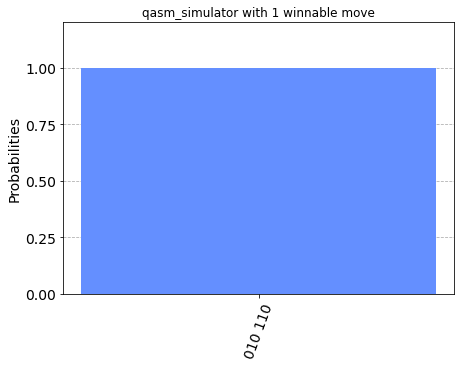

In [85]:
plot_histogram(qasm_sim_counts,bar_labels=False,title='qasm_simulator with 1 winnable move')

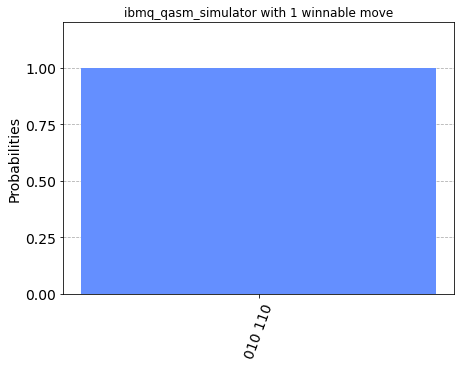

In [86]:
plot_histogram(ibmq_qasm_sim_counts,bar_labels=False,title='ibmq_qasm_simulator with 1 winnable move')

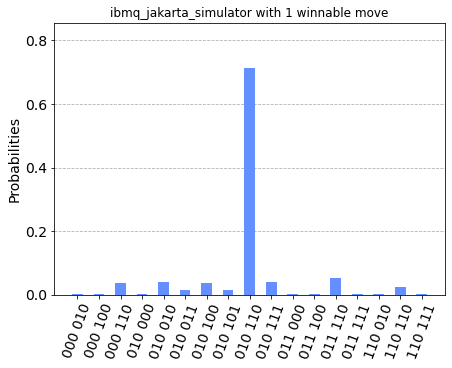

In [87]:
plot_histogram(jakarta_sim_counts,bar_labels=False,title='ibmq_jakarta_simulator with 1 winnable move')

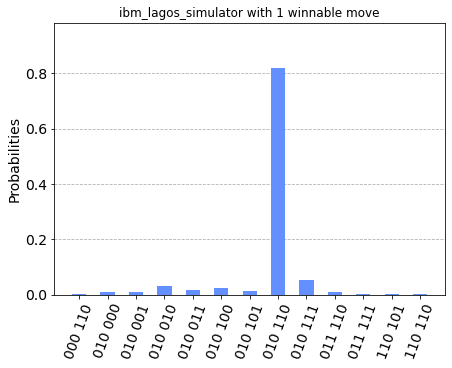

In [88]:
plot_histogram(lagos_sim_counts,bar_labels=False,title='ibm_lagos_simulator with 1 winnable move')

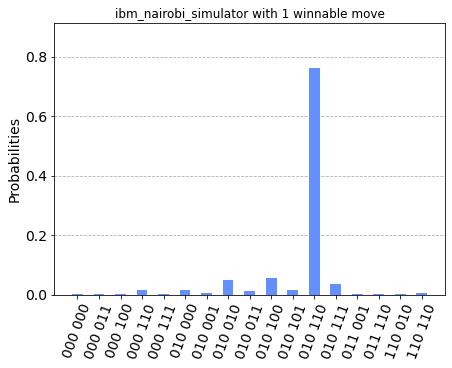

In [89]:
plot_histogram(nairobi_sim_counts,bar_labels=False,title='ibm_nairobi_simulator with 1 winnable move')

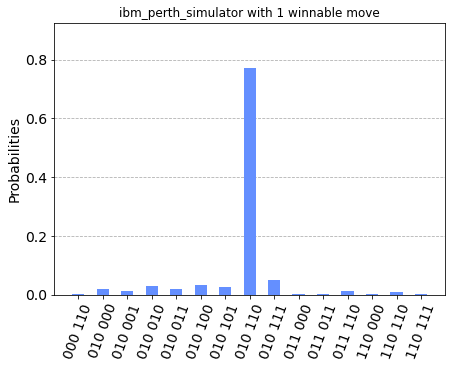

In [90]:
plot_histogram(perth_sim_counts,bar_labels=False,title='ibm_perth_simulator with 1 winnable move')

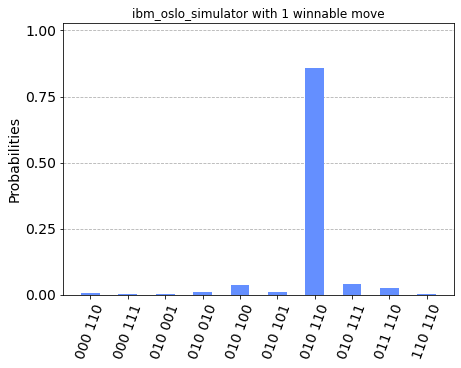

In [91]:
plot_histogram(oslo_sim_counts,bar_labels=False,title='ibm_oslo_simulator with 1 winnable move')

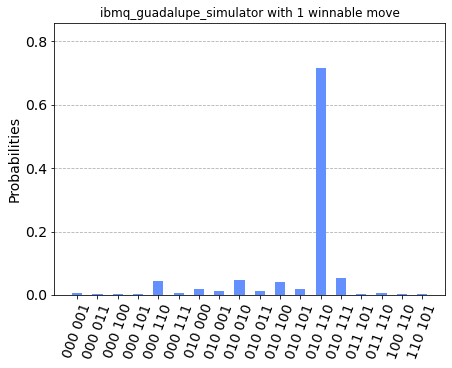

In [92]:
plot_histogram(guadalupe_sim_counts,bar_labels=False,title='ibmq_guadalupe_simulator with 1 winnable move')

## 2. Multiple winnable move possible
## Input $ heap = [1,3,4,7]$

In [93]:
piles = [1,3,4,7]

In [94]:
qasm_sim_counts = get_quantum_move(piles, backend=qasm_sim)
ibmq_qasm_sim_counts = get_quantum_move(piles, backend=ibmq_qasm_sim)
jakarta_sim_counts = get_quantum_move(piles, backend=jakarta_sim)
lagos_sim_counts = get_quantum_move(piles, backend=lagos_sim)
nairobi_sim_counts = get_quantum_move(piles, backend=nairobi_sim)
perth_sim_counts = get_quantum_move(piles, backend=perth_sim)
oslo_sim_counts = get_quantum_move(piles, backend=oslo_sim)
guadalupe_sim_counts = get_quantum_move(piles, backend=guadalupe_sim)

Experiment performed on: qasm_simulator
Pick from: 1
Amount: 1
Experiment performed on: ibmq_qasm_simulator
Pick from: 4
Amount: 1
Experiment performed on: qasm_simulator(ibmq_jakarta)
'Multiple values have the same maximum counts: 011 000,010 101'
Pick from: 2
Amount: 6
Experiment performed on: qasm_simulator(ibm_lagos)
Pick from: 7
Amount: 0
Experiment performed on: qasm_simulator(ibm_nairobi)
Pick from: 3
Amount: 0
Experiment performed on: qasm_simulator(ibm_perth)
Pick from: 3
Amount: 0
Experiment performed on: qasm_simulator(ibm_oslo)
Pick from: 3
Amount: 0
Experiment performed on: qasm_simulator(ibmq_guadalupe)
Pick from: 3
Amount: 0


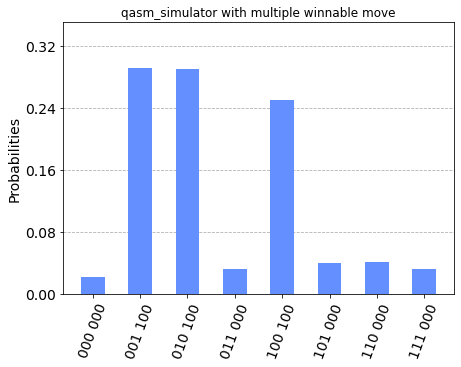

In [95]:
plot_histogram(qasm_sim_counts,bar_labels=False,title='qasm_simulator with multiple winnable move')

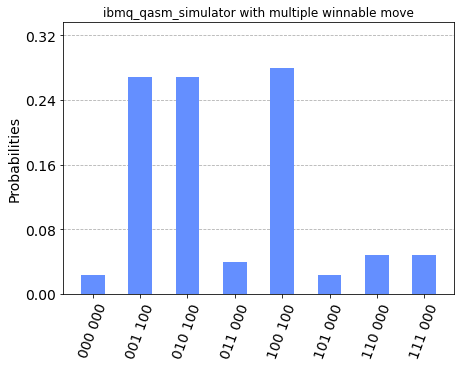

In [96]:
plot_histogram(ibmq_qasm_sim_counts,bar_labels=False,title='ibmq_qasm_simulator with multiple winnable move')

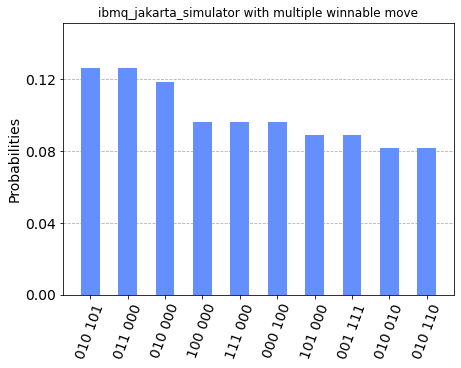

In [97]:
plot_histogram(jakarta_sim_counts,bar_labels=False,title='ibmq_jakarta_simulator with multiple winnable move',sort='value_desc',number_to_keep=10)

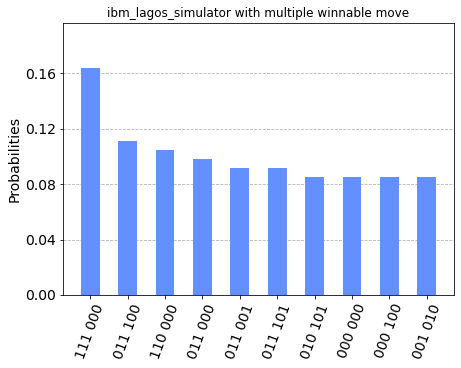

In [98]:
plot_histogram(lagos_sim_counts,bar_labels=False,title='ibm_lagos_simulator with multiple winnable move',sort='value_desc',number_to_keep=10)

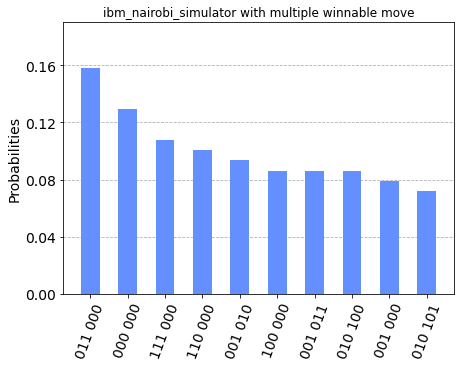

In [99]:
plot_histogram(nairobi_sim_counts,bar_labels=False,title='ibm_nairobi_simulator with multiple winnable move',sort='value_desc',number_to_keep=10)

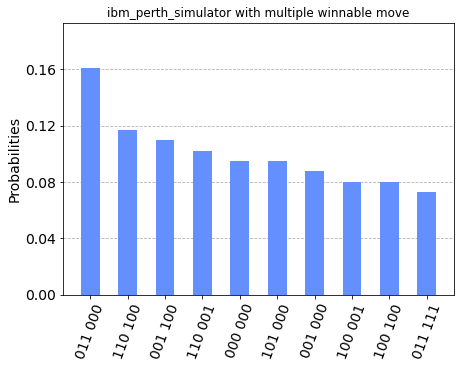

In [100]:
plot_histogram(perth_sim_counts,bar_labels=False,title='ibm_perth_simulator with multiple winnable move',sort='value_desc',number_to_keep=10)

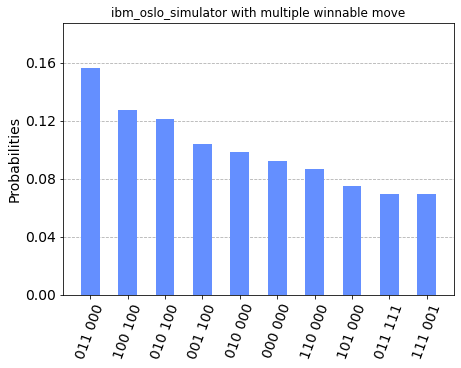

In [101]:
plot_histogram(oslo_sim_counts,bar_labels=False,title='ibm_oslo_simulator with multiple winnable move',sort='value_desc',number_to_keep=10)

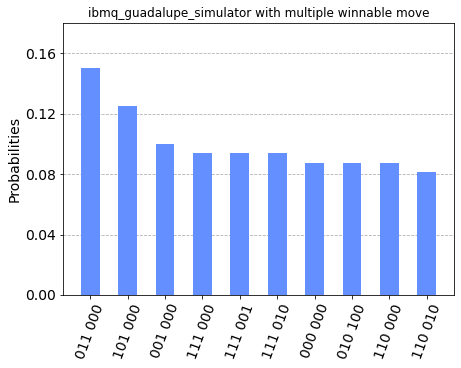

In [102]:
plot_histogram(guadalupe_sim_counts,bar_labels=False,title='ibmq_guadalupe_simulator with multiple winnable move',sort='value_desc',number_to_keep=10)

## 3. No winnable move possible
## Input $ heap = [1,3,5,7]$

In [103]:
piles = [1,3,5,7]

In [104]:
qasm_sim_counts = get_quantum_move(piles, backend=qasm_sim)
ibmq_qasm_sim_counts = get_quantum_move(piles, backend=ibmq_qasm_sim)
jakarta_sim_counts = get_quantum_move(piles, backend=jakarta_sim)
lagos_sim_counts = get_quantum_move(piles, backend=lagos_sim)
nairobi_sim_counts = get_quantum_move(piles, backend=nairobi_sim)
perth_sim_counts = get_quantum_move(piles, backend=perth_sim)
oslo_sim_counts = get_quantum_move(piles, backend=oslo_sim)
guadalupe_sim_counts = get_quantum_move(piles, backend=guadalupe_sim)

Experiment performed on: qasm_simulator
Pick from: 3
Amount: 1
Experiment performed on: ibmq_qasm_simulator
Pick from: 2
Amount: 1
Experiment performed on: qasm_simulator(ibmq_jakarta)
Pick from: 4
Amount: 1
Experiment performed on: qasm_simulator(ibm_lagos)
Pick from: 7
Amount: 0
Experiment performed on: qasm_simulator(ibm_nairobi)
Pick from: 5
Amount: 0
Experiment performed on: qasm_simulator(ibm_perth)
Pick from: 0
Amount: 0
Experiment performed on: qasm_simulator(ibm_oslo)
Pick from: 4
Amount: 1
Experiment performed on: qasm_simulator(ibmq_guadalupe)
Pick from: 4
Amount: 1


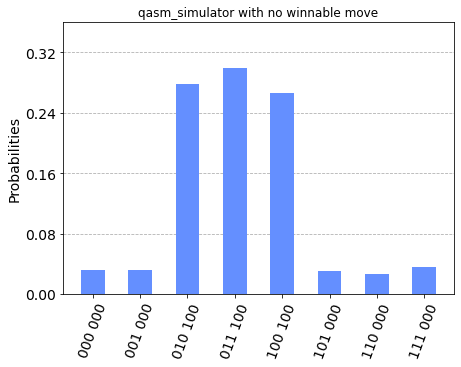

In [105]:
plot_histogram(qasm_sim_counts,bar_labels=False,title='qasm_simulator with no winnable move')

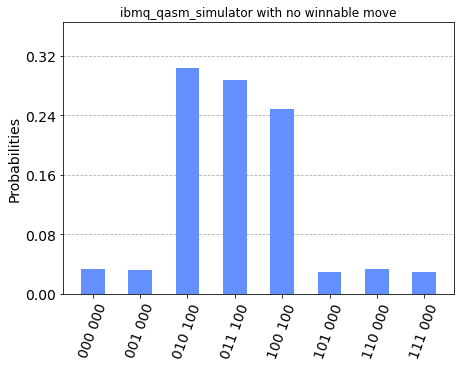

In [106]:
plot_histogram(ibmq_qasm_sim_counts,bar_labels=False,title='ibmq_qasm_simulator with no winnable move')

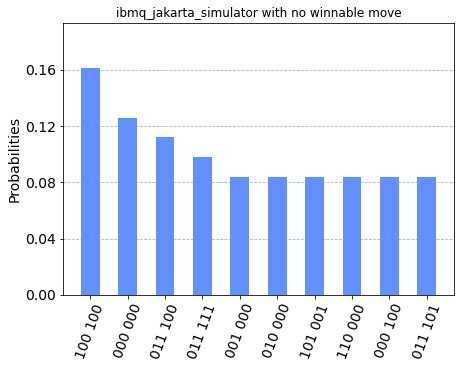

In [107]:
plot_histogram(jakarta_sim_counts,bar_labels=False,title='ibmq_jakarta_simulator with no winnable move',sort='value_desc',number_to_keep=10)

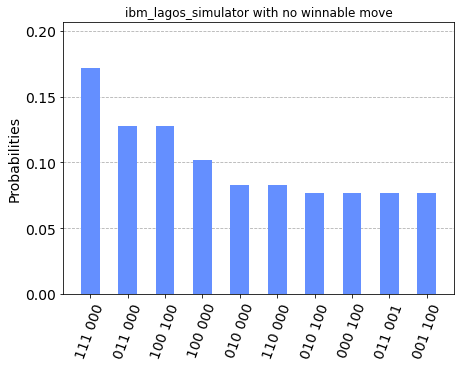

In [108]:
plot_histogram(lagos_sim_counts,bar_labels=False,title='ibm_lagos_simulator with no winnable move',sort='value_desc',number_to_keep=10)

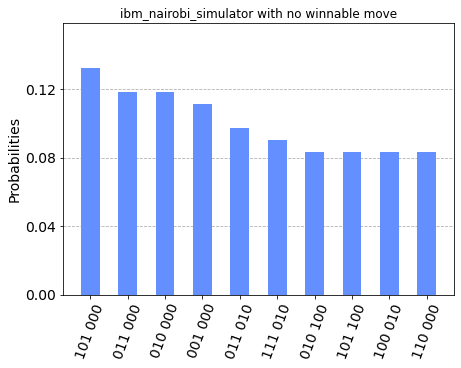

In [109]:
plot_histogram(nairobi_sim_counts,bar_labels=False,title='ibm_nairobi_simulator with no winnable move',sort='value_desc',number_to_keep=10)

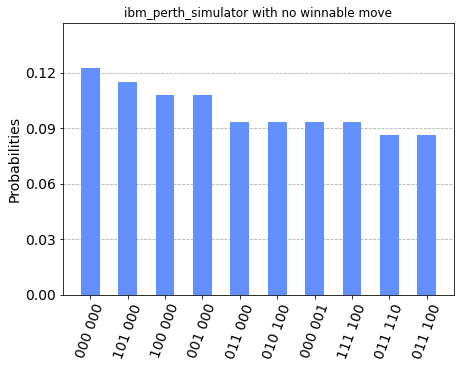

In [110]:
plot_histogram(perth_sim_counts,bar_labels=False,title='ibm_perth_simulator with no winnable move',sort='value_desc',number_to_keep=10)

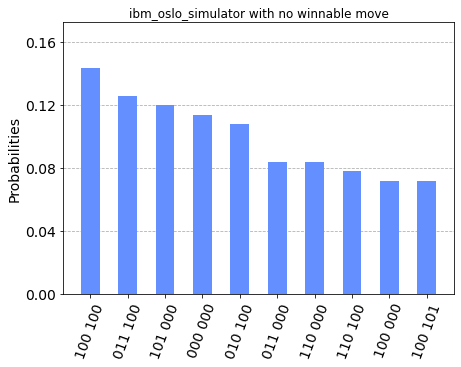

In [111]:

plot_histogram(oslo_sim_counts,bar_labels=False,title='ibm_oslo_simulator with no winnable move',sort='value_desc',number_to_keep=10)

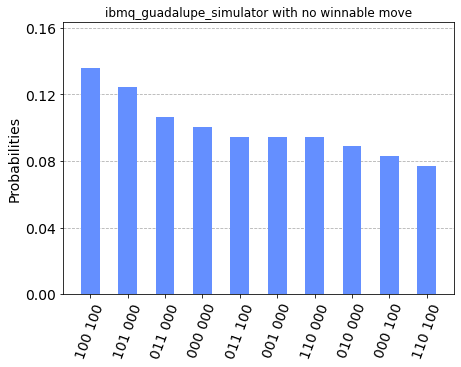

In [112]:
plot_histogram(guadalupe_sim_counts,bar_labels=False,title='ibmq_guadalupe_simulator with no winnable move',sort='value_desc',number_to_keep=10)

## 4. Misere step
## Input $ heap = [1,3,5,7]$

In [113]:
piles = [1,7,1,0]

In [114]:
qasm_sim_counts = get_quantum_move(piles, backend=qasm_sim)
ibmq_qasm_sim_counts = get_quantum_move(piles, backend=ibmq_qasm_sim)
jakarta_sim_counts = get_quantum_move(piles, backend=jakarta_sim)
lagos_sim_counts = get_quantum_move(piles, backend=lagos_sim)
nairobi_sim_counts = get_quantum_move(piles, backend=nairobi_sim)
perth_sim_counts = get_quantum_move(piles, backend=perth_sim)
oslo_sim_counts = get_quantum_move(piles, backend=oslo_sim)
guadalupe_sim_counts = get_quantum_move(piles, backend=guadalupe_sim)

Experiment performed on: qasm_simulator
Pick from: 2
Amount: 6
Experiment performed on: ibmq_qasm_simulator
Pick from: 2
Amount: 6
Experiment performed on: qasm_simulator(ibmq_jakarta)
Pick from: 2
Amount: 6
Experiment performed on: qasm_simulator(ibm_lagos)
Pick from: 2
Amount: 6
Experiment performed on: qasm_simulator(ibm_nairobi)
Pick from: 2
Amount: 6
Experiment performed on: qasm_simulator(ibm_perth)
Pick from: 2
Amount: 6
Experiment performed on: qasm_simulator(ibm_oslo)
Pick from: 2
Amount: 6
Experiment performed on: qasm_simulator(ibmq_guadalupe)
Pick from: 2
Amount: 6


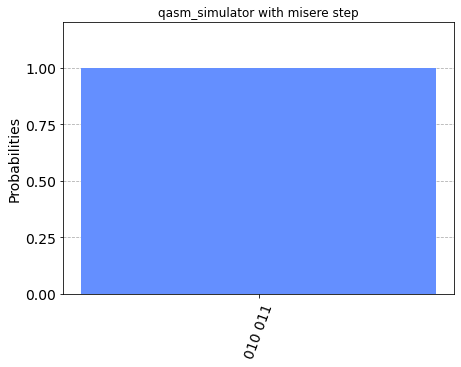

In [115]:
plot_histogram(qasm_sim_counts,bar_labels=False,title='qasm_simulator with misere step')

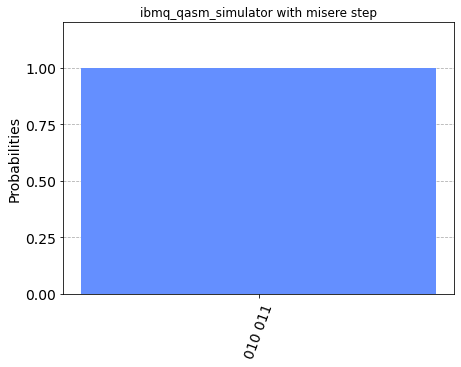

In [116]:
plot_histogram(ibmq_qasm_sim_counts,bar_labels=False,title='ibmq_qasm_simulator with misere step')

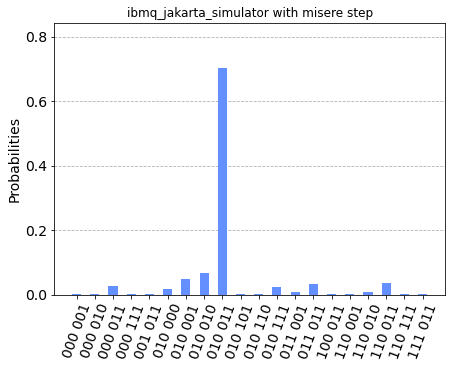

In [117]:
plot_histogram(jakarta_sim_counts,bar_labels=False,title='ibmq_jakarta_simulator with misere step')

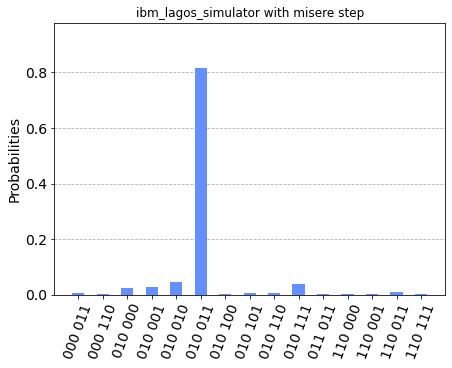

In [118]:
plot_histogram(lagos_sim_counts,bar_labels=False,title='ibm_lagos_simulator with misere step')

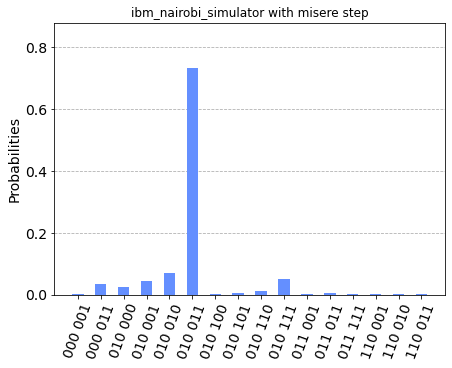

In [119]:
plot_histogram(nairobi_sim_counts,bar_labels=False,title='ibm_nairobi_simulator with misere step')

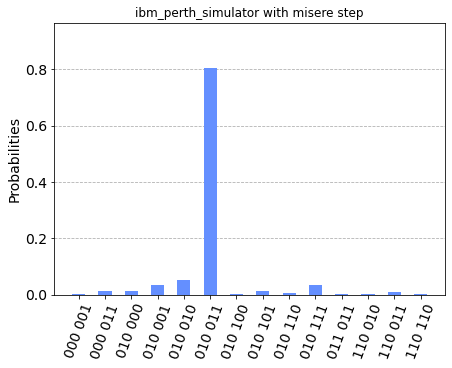

In [120]:
plot_histogram(perth_sim_counts,bar_labels=False,title='ibm_perth_simulator with misere step')

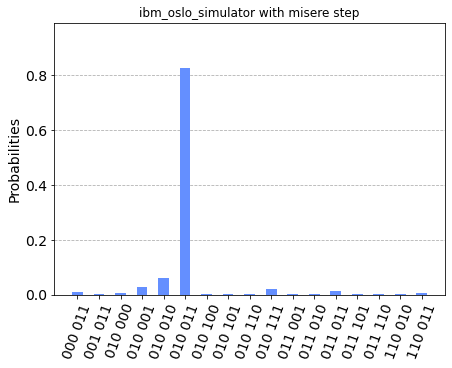

In [121]:
plot_histogram(oslo_sim_counts,bar_labels=False,title='ibm_oslo_simulator with misere step')

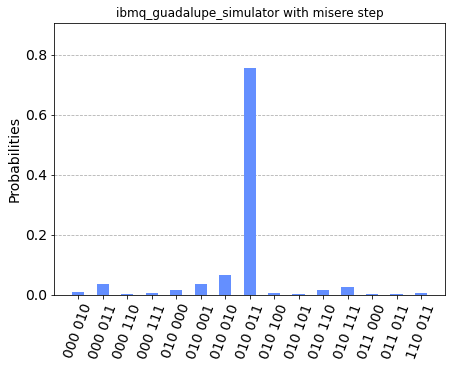

In [122]:
plot_histogram(guadalupe_sim_counts,bar_labels=False,title='ibmq_guadalupe_simulator with misere step')